# Starbucks Customer Survey

### Objective
Perform prepocessing and model prediction on the Starbucks customer dataset available from Kaggle
Some operations include:

1.	Objective
2.	Data Exploration
3.	Missing Data
4.	Outliers
5.	Data Standardization or Normalization
6.	Data Sampling
7.	Train and Test

In [667]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)

In [668]:
df = pd.read_csv("starbucks_satisfactory_survey.csv")
df

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


## Preliminary Data Cleaning


### 1. Rename Columns
The column names consisted of questions which were hard to work with in code and hence needed to be changed to shorter but expressive names.

In [669]:
df.columns = [
              "timestamp", "gender",  "age",  "occupation", "income_rm", 
              "visit_frequency", "most_used_service", 'time_spent_per_visit', 
              "distance_from_shop",  "member",  "most_purchased_item",  
              "average_amount_spent_rm",  "brand_rating_comparison", 
              "price_rating",  "sales_promotions_influence",  
              "ambience_rating", "wifi_rating", "service_rating", 
              "preferred_social_hangout",  "referral",  "continued_patronage"
              ]
df.head()

,timestamp,gender,age,occupation,income_rm,visit_frequency,most_used_service,time_spent_per_visit,distance_from_shop,member,most_purchased_item,average_amount_spent_rm,brand_rating_comparison,price_rating,sales_promotions_influence,ambience_rating,wifi_rating,service_rating,preferred_social_hangout,referral,continued_patronage
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


### 2. Check data types
I ascertain the kind of data I would be working with. Knowledge of the associated datatype can help resolve data mismatch errors during computation.

In [670]:
df.dtypes

timestamp                     object
gender                        object
age                           object
occupation                    object
income_rm                     object
visit_frequency               object
most_used_service             object
time_spent_per_visit          object
distance_from_shop            object
member                        object
most_purchased_item           object
average_amount_spent_rm       object
brand_rating_comparison        int64
price_rating                   int64
sales_promotions_influence     int64
ambience_rating                int64
wifi_rating                    int64
service_rating                 int64
preferred_social_hangout       int64
referral                      object
continued_patronage           object
dtype: object

### 3. Check null data


Discover and remove null data especifically in the 'continued_patronage' column.

In [671]:
df.isnull().sum()

timestamp                     0
gender                        0
age                           0
occupation                    0
income_rm                     0
visit_frequency               0
most_used_service             1
time_spent_per_visit          0
distance_from_shop            0
member                        0
most_purchased_item           0
average_amount_spent_rm       0
brand_rating_comparison       0
price_rating                  0
sales_promotions_influence    0
ambience_rating               0
wifi_rating                   0
service_rating                0
preferred_social_hangout      0
referral                      1
continued_patronage           0
dtype: int64

There are only a few missing data. A lot can be done to clean up the data but this null margin is not that bad. I replace these null values with 'none'

In [672]:
df.most_used_service.fillna(value='unknown', inplace=True)
df.most_used_service.value_counts()

Take away             49
Dine in               46
Drive-thru            20
never                  2
unknown                1
Never                  1
Never                  1
I dont like coffee     1
Never buy              1
Name: most_used_service, dtype: int64

In [673]:
df.referral.fillna(value='unknown', inplace=True)
_ = df.referral.value_counts()

In [674]:
df.isnull().sum()

timestamp                     0
gender                        0
age                           0
occupation                    0
income_rm                     0
visit_frequency               0
most_used_service             0
time_spent_per_visit          0
distance_from_shop            0
member                        0
most_purchased_item           0
average_amount_spent_rm       0
brand_rating_comparison       0
price_rating                  0
sales_promotions_influence    0
ambience_rating               0
wifi_rating                   0
service_rating                0
preferred_social_hangout      0
referral                      0
continued_patronage           0
dtype: int64

## Data Visualizations

Firstly, I import my preferred libraries for this data visualizaition exercise. Seaborn is particularly a choice because of its minimal code and aesthetics. 

In [675]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,4)

In [676]:
import seaborn as sns
sns.set(style="whitegrid")

### Target Field

Let's get a feel of the Starbucks responses and visualize the various distributions.

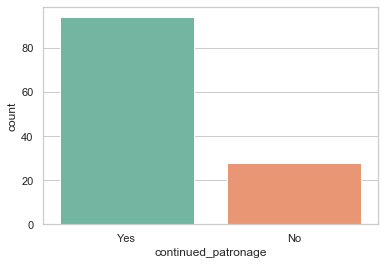

In [677]:
_ = sns.countplot(x='continued_patronage', 
                  data=df, 
                  order=df.continued_patronage.value_counts().index, 
                  palette='Set2')

### Age

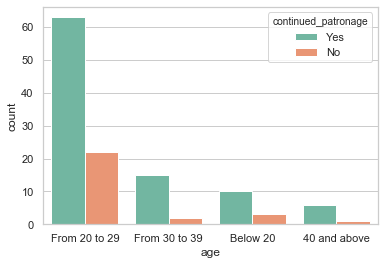

In [678]:
h = sns.countplot(x='age', 
                  hue='continued_patronage', 
                  data=df, 
                  order=df.age.value_counts().index, 
                  palette='Set2')
_ = h.set_xticklabels(h.get_xticklabels())

### Occupation

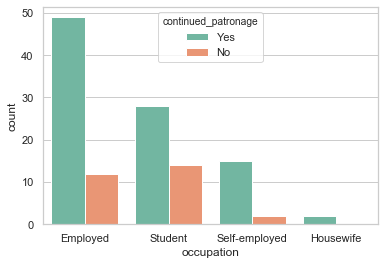

In [679]:
h = sns.countplot(x='occupation', 
                  hue='continued_patronage', 
                  data=df, 
                  order=df.occupation.value_counts().index, 
                  palette='Set2')
_ = h.set_xticklabels(h.get_xticklabels(),)

### Income

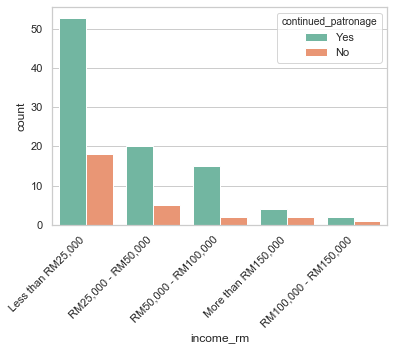

In [680]:
h = sns.countplot(x='income_rm', 
                  hue='continued_patronage', 
                  data=df, order=df.income_rm.value_counts().index, 
                  palette='Set2')
_ = h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')

### Gender

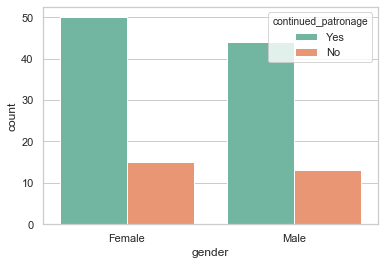

In [681]:
h = sns.countplot(x='gender', 
                  hue='continued_patronage', 
                  data=df, 
                  order=df.gender.value_counts().index, 
                  palette='Set2')
_ = h.set_xticklabels(h.get_xticklabels())

It turns out that most of the regular customers are within the age of 20 - 29 and our least amount is from the 40 and above age range. We need to find out what categories of people comprise this 20 -29 age group. In order to do this, I filter the dataset to only include those that fall within the range of 20 - 29.

In [682]:
filter_boolean = (df['age']=='From 20 to 29')
only_age_20_29 = df[filter_boolean]

Get a glimpse of how the new dataset looks.

In [683]:
_ = only_age_20_29.head()

Now that we have the new data set, we'll plot the age group 20-29 against Occupation, Income and Gender to see the kind of people that make of majority of Starbuck's retained customers.

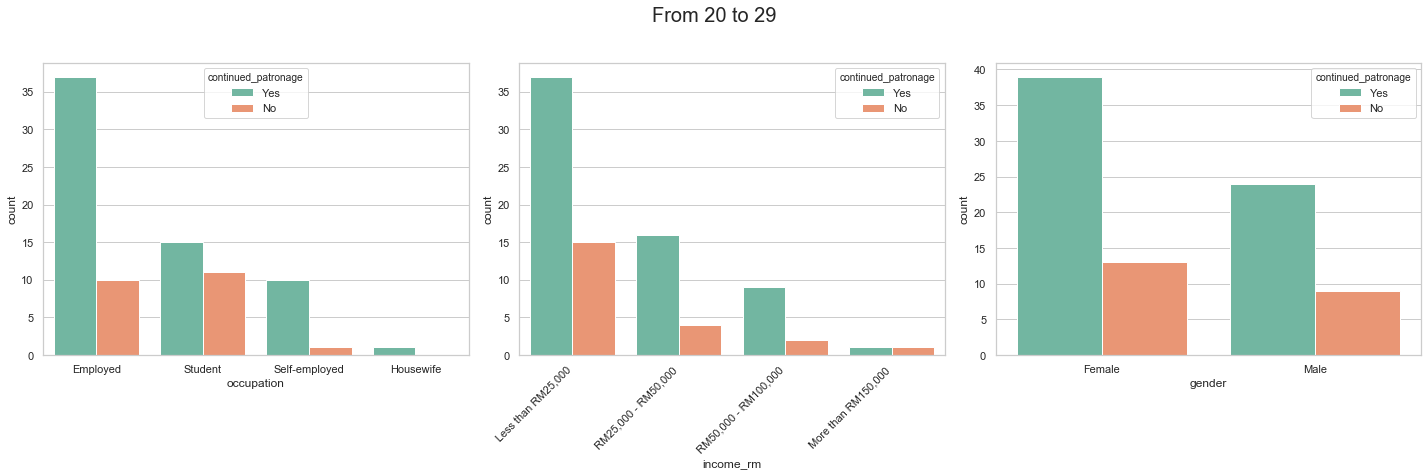

In [684]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))

_ = sns.countplot(x='occupation', hue='continued_patronage', data=only_age_20_29, order=only_age_20_29.occupation.value_counts().index, ax=axs[0], palette='Set2')
g = sns.countplot(x='income_rm', hue='continued_patronage', data=only_age_20_29, order=only_age_20_29.income_rm.value_counts().index, ax=axs[1], palette='Set2')
_ = sns.countplot(x='gender', hue='continued_patronage', data=only_age_20_29, order=only_age_20_29.gender.value_counts().index, ax=axs[2], palette='Set2')

g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right', rotation=45)

fig.suptitle('From 20 to 29', position=(.5,1.1), fontsize=20)
fig.tight_layout()

## Some more data visualisations

### 1. Pricing Rating
Let's see how many people reacted to the pricing of Starbucks products

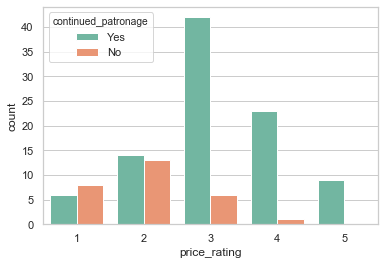

In [685]:
_ = sns.countplot(df.price_rating, hue=df.continued_patronage, palette='Set2')

More customers in the dataset rate Starbucks prices as average. This rating is also given by most of the loyal customers.

From the dataset, we also see an expected pattern. As the price rating decreased, the number of customers that opted out also increased. 

### 2. Distance of Shop
Looking into how distance plays a role in the customer behavior

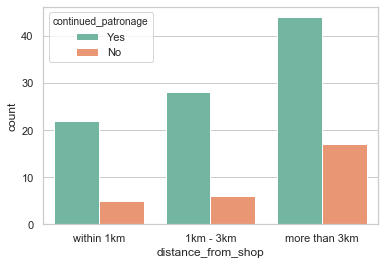

In [686]:
_ = sns.countplot(df['distance_from_shop'], hue=df.continued_patronage, palette='Set2')

These results do not seem to follow normal logic at first glance as it indicates that loyal customers in the dataset frequent farther shops than closer ones. 

One expanation for this could be preference. These goes to show how loyal they are even down to the particular Starbucks shop. 

An expected trend is seen with non-patronizers in the dataset as their numbers increase with an increase in distance.

### 3. Starbucks Features and Services
Looking into the adopted use case of the Starbucks shops

1. Social Hangout

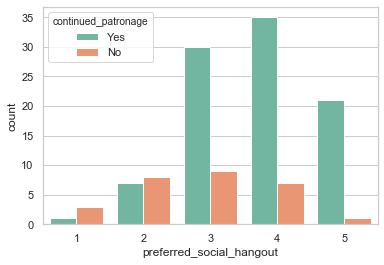

In [687]:
_ = sns.countplot(df.preferred_social_hangout, hue=df.continued_patronage, palette='Set2')

Loyal customers from the dataset seem to prefer Starbucks as a social zone only averagely. More of the one-time customers seem to portray the same attitude.

2. Most Used Service

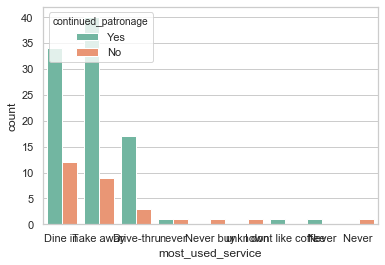

In [688]:
_ = sns.countplot(df.most_used_service, hue=df.continued_patronage, palette='Set2')

Seems more customers in the dataset prefer the Dine in and take away services more compared with other services. Most loyal customers in there also opted for the take away service. 

Looking deeper into this behavior of loyal customers:

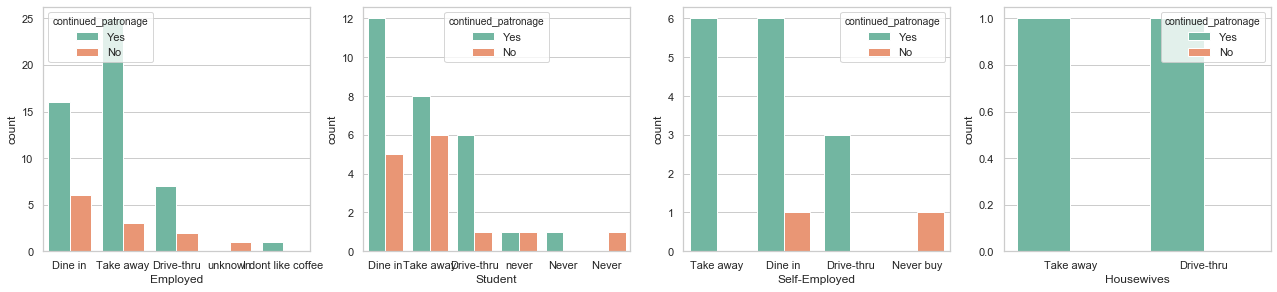

In [689]:
fig, axs = plt.subplots(ncols=4, figsize=(22, 4.5))

g = sns.countplot(df.most_used_service[df.occupation == 'Employed'], hue=df.continued_patronage, palette='Set2', ax=axs[0])
_ = g.set_xlabel('Employed')
h = sns.countplot(df.most_used_service[df.occupation == 'Student'], hue=df.continued_patronage, palette='Set2', ax=axs[1])
_ = h.set_xlabel('Student')
i = sns.countplot(df.most_used_service[df.occupation == 'Self-employed'], hue=df.continued_patronage, palette='Set2', ax=axs[2])
_ = i.set_xlabel('Self-Employed')
j = sns.countplot(df.most_used_service[df.occupation == 'Housewife'], hue=df.continued_patronage, palette='Set2', ax=axs[3])
_ = j.set_xlabel('Housewives')

We can see that loyal customers in the dataset that are employed contribute the most to the take away service. This behaviour can be expected as employees often utilize coffee to keep awake during work. 

Also, as at the time of the survey, majority of employees worked from an office which required them to be physically present at the venue. Hence a takeaway is more appropriate. However, with the advent of the lockdown in 2020, the mindset of compulsory office hours is starting to dwindle, and is gradually being replaced with a more remote approach.

We also see that students in the dataset utilize the Dine in service more than the Employed customers. This is expected as students are more flexible with work and have more opportunity to work remotely given the nature of their tasks such as assignments, term papers, thesis etc. all of such that can most times be done from the comfort of almost anywhere.

Looking at the choice os social hangouts by Starbucks shops by students:

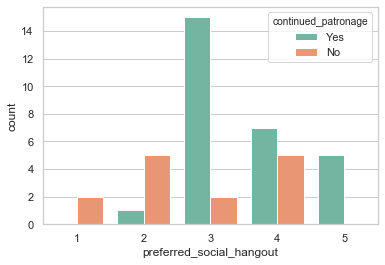

In [690]:
_ = sns.countplot(df.preferred_social_hangout[df.occupation == 'Student'], hue=df.continued_patronage, palette='Set2')

We see that in the dataset, students averagely prefer to hang out at Starbucks. This puts more perpective as to why more students patronize the dine in service.

### 4. Sales Promotion
Checking how much sales promotions influenced user behaviour

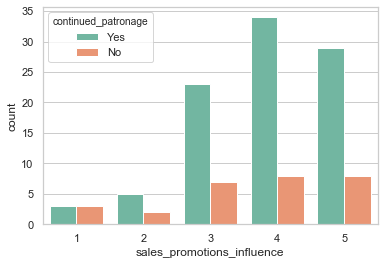

In [691]:
_ = sns.countplot(df.sales_promotions_influence, hue=df.continued_patronage, palette='Set2')

From the dataset, we see that an increment in sales promotions corresponds with an increment count of loyal customers. This is also true for one-time customers.

## Dummy Coding

Exploring the various datatypes

In [692]:
df.dtypes

timestamp                     object
gender                        object
age                           object
occupation                    object
income_rm                     object
visit_frequency               object
most_used_service             object
time_spent_per_visit          object
distance_from_shop            object
member                        object
most_purchased_item           object
average_amount_spent_rm       object
brand_rating_comparison        int64
price_rating                   int64
sales_promotions_influence     int64
ambience_rating                int64
wifi_rating                    int64
service_rating                 int64
preferred_social_hangout       int64
referral                      object
continued_patronage           object
dtype: object

We apply dummy coding to features that are not interval/ratio or ordinal data (i.e 'object' datatype)

- Gender

In [693]:
df.gender.value_counts()

Female    65
Male      57
Name: gender, dtype: int64

In [694]:
gender_dummy = pd.get_dummies(df.gender)
gender_dummy.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


I think 'Male' and 'Female' are pretty self-explanatory and hence would leave out the 'gender_' prefix.

- Age

In [695]:
age_dummy = pd.get_dummies(df.age)
age_dummy.head()

,40 and above,Below 20,From 20 to 29,From 30 to 39
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Adding the 'age_' prefixes to each subgroup

In [696]:
age_dummy.columns = ['age_'+col for col in age_dummy.columns]
age_dummy.head()

,age_40 and above,age_Below 20,age_From 20 to 29,age_From 30 to 39
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Great, now to speed up the process...

- Occupation

In [697]:
occupation_dummy = pd.get_dummies(df.occupation)
occupation_dummy.columns = ['occupation_'+col 
                            for col in occupation_dummy.columns]
occupation_dummy.head()

,occupation_Employed,occupation_Housewife,occupation_Self-employed,occupation_Student
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


- Income

In [698]:
income_dummy = pd.get_dummies(df.income_rm)
income_dummy.columns = ['income_'+col for col in income_dummy.columns]
income_dummy.head()

,"income_Less than RM25,000","income_More than RM150,000","income_RM100,000 - RM150,000","income_RM25,000 - RM50,000","income_RM50,000 - RM100,000"
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


- Visit Frequency

In [699]:
visit_frequency_dummy = pd.get_dummies(df.visit_frequency)
visit_frequency_dummy.columns = ['visit_'+col 
                                 for col in visit_frequency_dummy.columns]
visit_frequency_dummy.head()

,visit_Daily,visit_Monthly,visit_Never,visit_Rarely,visit_Weekly
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


- Most Used Service

In [700]:
df.most_used_service.value_counts()

Take away             49
Dine in               46
Drive-thru            20
never                  2
unknown                1
Never                  1
Never                  1
I dont like coffee     1
Never buy              1
Name: most_used_service, dtype: int64

Merge all the negative replies into one, 'Never'

In [701]:
df.most_used_service.replace(to_replace={'Never ': 'Never',
                                         'Never buy': 'Never', 
                                         'never': 'Never',
                                         'I dont like coffee': 'Never'}, 
                             inplace=True)
_ = df.most_used_service.value_counts()

In [702]:
most_used_service_dummy = pd.get_dummies(df.most_used_service)
most_used_service_dummy.columns = ['most_used_'+col 
                                   for col in most_used_service_dummy.columns]
most_used_service_dummy.head()

,most_used_Dine in,most_used_Drive-thru,most_used_Never,most_used_Take away,most_used_unknown
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


- Time Spent per visit

In [703]:
time_spent_per_visit_dummy = pd.get_dummies(df.time_spent_per_visit)
time_spent_per_visit_dummy.columns = ['time_spent_'+col 
                                      for col in time_spent_per_visit_dummy.columns]
time_spent_per_visit_dummy.head()

,time_spent_Below 30 minutes,time_spent_Between 1 hour to 2 hours,time_spent_Between 2 hours to 3 hours,time_spent_Between 30 minutes to 1 hour,time_spent_More than 3 hours
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0


- Distance from shop

In [704]:
distance_from_shop_dummy = pd.get_dummies(df.distance_from_shop)
distance_from_shop_dummy.columns = ['distance_'+col 
                                    for col in distance_from_shop_dummy.columns]
distance_from_shop_dummy.head()

,distance_1km - 3km,distance_more than 3km,distance_within 1km
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


- Member

In [705]:
member_dummy = pd.get_dummies(df.member)
member_dummy.columns = ['is_member_'+col for col in member_dummy.columns]
member_dummy.head()

,is_member_No,is_member_Yes
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


- Most purchased item, this one is a little tricky.

In [706]:
pd.get_dummies(df.most_purchased_item)

,Coffee,Coffee;Cold drinks,Coffee;Cold drinks;Juices;Pastries;Sandwiches,Coffee;Cold drinks;Pastries;Sandwiches,Coffee;Juices;Pastries;Sandwiches,Coffee;Pastries,Coffee;Pastries;Sandwiches,Coffee;Sandwiches,Cold drinks,Cold drinks;Juices;Pastries,Cold drinks;Never,Cold drinks;Pastries,Cold drinks;Pastries;Sandwiches,Jaws chip,Never,Never buy any,Nothing,Pastries,cake,never
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
118,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Splitting the string

In [707]:
split_list = df.most_purchased_item.str.split(pat=';')
split_list

0                                               [Coffee]
1                                [Cold drinks, Pastries]
2                                               [Coffee]
3                                               [Coffee]
4                                   [Coffee, Sandwiches]
                             ...                        
117                                             [Coffee]
118    [Coffee, Cold drinks, Juices, Pastries, Sandwi...
119                                [Coffee, Cold drinks]
120                                             [Coffee]
121                                             [Coffee]
Name: most_purchased_item, Length: 122, dtype: object

Making the individual colums

In [708]:
most_purchased_coffee = [1 if 'Coffee' in items else 0 for items in split_list.values]
most_purchased_pastries = [1 if 'Pastries' in items else 0 for items in split_list.values]
most_purchased_sandwiches = [1 if 'Sandwiches' in items else 0 for items in split_list.values]
most_purchased_cold_drinks = [1 if 'Cold drinks' in items else 0 for items in split_list.values]
most_purchased_juices = [1 if 'Juices' in items else 0 for items in split_list.values]
most_purchased_never = [1 if 'Never buy any' in items else 1 if 'Never' in items else 1 
                        if 'nothing' in items else 1 
                        if 'never' in items else 0 for items in split_list.values]
most_purchased_cake = [1 if 'cake' in items else 0 for items in split_list.values]
most_purchased_jaws_chip = [1 if 'Jaws chip' in items else 0 for items in split_list.values]

Let's see how most_purchased_coffee looks. I'll print it horizontally.


In [709]:
print(most_purchased_coffee, end=" ")

[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1] 

Now let's see how the whole dummy coding looks

In [710]:
most_purchased_items_dummy = pd.DataFrame({'most_purchased_coffee':most_purchased_coffee, 
                                           'most_purchased_pastries':most_purchased_pastries, 
                                           'most_purchased_sandwiches':most_purchased_sandwiches, 
                                           'most_purchased_cold_drinks':most_purchased_cold_drinks, 
                                           'most_purchased_juices':most_purchased_juices, 
                                           'most_purchased_never':most_purchased_never, 
                                           'most_purchased_cake':most_purchased_cake, 
                                           'most_purchased_jaws_chip':most_purchased_jaws_chip  })
most_purchased_items_dummy

,most_purchased_coffee,most_purchased_pastries,most_purchased_sandwiches,most_purchased_cold_drinks,most_purchased_juices,most_purchased_never,most_purchased_cake,most_purchased_jaws_chip
0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
117,1,0,0,0,0,0,0,0
118,1,1,1,1,1,0,0,0
119,1,0,0,1,0,0,0,0
120,1,0,0,0,0,0,0,0


- Next, Average amount spent

In [711]:
average_amount_spent_dummy = pd.get_dummies(df.average_amount_spent_rm)
average_amount_spent_dummy.columns = ['average_amount_spent_'+col 
                                      for col in average_amount_spent_dummy.columns]
average_amount_spent_dummy

,average_amount_spent_Around RM20 - RM40,average_amount_spent_Less than RM20,average_amount_spent_More than RM40,average_amount_spent_Zero
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
117,1,0,0,0
118,0,0,1,0
119,0,1,0,0
120,0,1,0,0


- Referral

In [712]:
pd.get_dummies(df.referral).head()

,Application offer,Billboards,Emails,In Store displays,In Store displays;Billboards,Never hear,Social Media,"Social Media;Deal sites (fave, iprice, etc...)","Social Media;Deal sites (fave, iprice, etc...);Through friends and word of mouth",Social Media;Emails,"Social Media;Emails;Deal sites (fave, iprice, etc...);Through friends and word of mouth;In Store displays;Billboards",Social Media;Emails;Through friends and word of mouth,Social Media;In Store displays,Social Media;In Store displays;Billboards,Social Media;Through friends and word of mouth,Social Media;Through friends and word of mouth;Billboards,Social Media;Through friends and word of mouth;In Store displays,Social Media;Through friends and word of mouth;In Store displays;Billboards,Starbucks Website/Apps,"Starbucks Website/Apps;Deal sites (fave, iprice, etc...)",Starbucks Website/Apps;Emails,Starbucks Website/Apps;Social Media,"Starbucks Website/Apps;Social Media;Deal sites (fave, iprice, etc...);Through friends and word of mouth",Starbucks Website/Apps;Social Media;Emails;Billboards,"Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)","Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...);Through friends and word of mouth;In Store displays;Billboards",Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth,Starbucks Website/Apps;Social Media;Through friends and word of mouth,Starbucks Website/Apps;Social Media;Through friends and word of mouth;In Store displays,Through friends and word of mouth,Through friends and word of mouth;In Store displays,unknown
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Seems like we have to repeat the previous step again.

Splitting the string values

In [713]:
referral_split_list = df.referral.str.split(';')

Obtaining individual referral type counts

In [714]:
referral_application_offer = [1 if 'Application offer' in items else 0 for items in referral_split_list.values]
referral_billboards = [1 if 'Billboards' in items else 0 for items in referral_split_list.values]
referral_emails = [1 if 'Emails' in items else 0 for items in referral_split_list.values]
referral_in_store = [1 if 'In Store displays' in items else 0 for items in referral_split_list.values]
referral_never = [1 if 'Never hear' in items else 1 if 'none' in items else 0 for items in referral_split_list.values]
referral_social_media = [1 if 'Social Media' in items else 0 for items in referral_split_list.values]
referral_deal_sites = [1 if "Deal sites (fave, iprice, etc...)" in items else 0 for items in referral_split_list.values]
referral_friends = [1 if "Through friends and word of mouth" in items else 0 for items in referral_split_list.values]
referral_starbucks_website_app = [1 if "Starbucks Website/Apps" in items else 0 for items in referral_split_list.values]

Creating dummy code

In [715]:
referral_dummy = pd.DataFrame({'referral_application_offer':referral_application_offer, 
                               'referral_billboards':referral_billboards, 
                               'referral_emails':referral_emails, 
                               'referral_in_store':referral_in_store, 
                               'referral_never':referral_never, 
                               'referral_social_media':referral_social_media, 
                               'referral_deal_sites':referral_deal_sites, 
                               'referral_friends':referral_friends,
                               'referral_starbucks_website_app':referral_starbucks_website_app })
referral_dummy.head()

,referral_application_offer,referral_billboards,referral_emails,referral_in_store,referral_never,referral_social_media,referral_deal_sites,referral_friends,referral_starbucks_website_app
0,0,0,1,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1


- Next, Continued Patronage

In [716]:
continued_patronage_dummy = pd.get_dummies(df.continued_patronage)
continued_patronage_dummy.columns = ['continued_patronage_'+col 
                                     for col in 
                                     continued_patronage_dummy.columns]
continued_patronage_dummy.head()

,continued_patronage_No,continued_patronage_Yes
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


### Finally, merge all the new dataframes into the current dataframe df

In [717]:
df_dummy = pd.concat([df, gender_dummy, age_dummy, distance_from_shop_dummy, 
                      occupation_dummy, income_dummy, visit_frequency_dummy, 
                      most_used_service_dummy, time_spent_per_visit_dummy, 
                      member_dummy, most_purchased_items_dummy, 
                      average_amount_spent_dummy, referral_dummy, 
                      continued_patronage_dummy], 
                     axis=1)
df_dummy.head()

,timestamp,gender,age,occupation,income_rm,visit_frequency,most_used_service,time_spent_per_visit,distance_from_shop,member,most_purchased_item,average_amount_spent_rm,brand_rating_comparison,price_rating,sales_promotions_influence,ambience_rating,wifi_rating,service_rating,preferred_social_hangout,referral,continued_patronage,Female,Male,age_40 and above,age_Below 20,age_From 20 to 29,age_From 30 to 39,distance_1km - 3km,distance_more than 3km,distance_within 1km,occupation_Employed,occupation_Housewife,occupation_Self-employed,occupation_Student,"income_Less than RM25,000","income_More than RM150,000","income_RM100,000 - RM150,000","income_RM25,000 - RM50,000","income_RM50,000 - RM100,000",visit_Daily,visit_Monthly,visit_Never,visit_Rarely,visit_Weekly,most_used_Dine in,most_used_Drive-thru,most_used_Never,most_used_Take away,most_used_unknown,time_spent_Below 30 minutes,time_spent_Between 1 hour to 2 hours,time_spent_Between 2 hours to 3 hours,time_spent_Between 30 minutes to 1 hour,time_spent_More than 3 hours,is_member_No,is_member_Yes,most_purchased_coffee,most_purchased_pastries,most_purchased_sandwiches,most_purchased_cold_drinks,most_purchased_juices,most_purchased_never,most_purchased_cake,most_purchased_jaws_chip,average_amount_spent_Around RM20 - RM40,average_amount_spent_Less than RM20,average_amount_spent_More than RM40,average_amount_spent_Zero,referral_application_offer,referral_billboards,referral_emails,referral_in_store,referral_never,referral_social_media,referral_deal_sites,referral_friends,referral_starbucks_website_app,continued_patronage_No,continued_patronage_Yes
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1


Drop columns that have been dummy coded

In [718]:
df_dummy.drop(['gender', 'age', 'occupation', 'income_rm', 'visit_frequency', 
               'most_used_service', 'time_spent_per_visit', 
               'distance_from_shop', 'member', 'most_purchased_item',
               'average_amount_spent_rm', 'referral',  
               'continued_patronage'], axis=1, inplace=True)
df_dummy.head()

,timestamp,brand_rating_comparison,price_rating,sales_promotions_influence,ambience_rating,wifi_rating,service_rating,preferred_social_hangout,Female,Male,age_40 and above,age_Below 20,age_From 20 to 29,age_From 30 to 39,distance_1km - 3km,distance_more than 3km,distance_within 1km,occupation_Employed,occupation_Housewife,occupation_Self-employed,occupation_Student,"income_Less than RM25,000","income_More than RM150,000","income_RM100,000 - RM150,000","income_RM25,000 - RM50,000","income_RM50,000 - RM100,000",visit_Daily,visit_Monthly,visit_Never,visit_Rarely,visit_Weekly,most_used_Dine in,most_used_Drive-thru,most_used_Never,most_used_Take away,most_used_unknown,time_spent_Below 30 minutes,time_spent_Between 1 hour to 2 hours,time_spent_Between 2 hours to 3 hours,time_spent_Between 30 minutes to 1 hour,time_spent_More than 3 hours,is_member_No,is_member_Yes,most_purchased_coffee,most_purchased_pastries,most_purchased_sandwiches,most_purchased_cold_drinks,most_purchased_juices,most_purchased_never,most_purchased_cake,most_purchased_jaws_chip,average_amount_spent_Around RM20 - RM40,average_amount_spent_Less than RM20,average_amount_spent_More than RM40,average_amount_spent_Zero,referral_application_offer,referral_billboards,referral_emails,referral_in_store,referral_never,referral_social_media,referral_deal_sites,referral_friends,referral_starbucks_website_app,continued_patronage_No,continued_patronage_Yes
0,2019/10/01 12:38:43 PM GMT+8,4,3,5,5,4,4,3,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1
1,2019/10/01 12:38:54 PM GMT+8,4,3,4,4,4,5,2,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
2,2019/10/01 12:38:56 PM GMT+8,4,3,4,4,4,4,3,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3,2019/10/01 12:39:08 PM GMT+8,2,1,4,3,3,3,3,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2019/10/01 12:39:20 PM GMT+8,3,3,4,2,2,3,3,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1


--------------------------------------------------------------------------------------------------------------------------------

Let's see how different variables are related:

In [719]:
df_dummy.corr()

,brand_rating_comparison,price_rating,sales_promotions_influence,ambience_rating,wifi_rating,service_rating,preferred_social_hangout,Female,Male,age_40 and above,age_Below 20,age_From 20 to 29,age_From 30 to 39,distance_1km - 3km,distance_more than 3km,distance_within 1km,occupation_Employed,occupation_Housewife,occupation_Self-employed,occupation_Student,"income_Less than RM25,000","income_More than RM150,000","income_RM100,000 - RM150,000","income_RM25,000 - RM50,000","income_RM50,000 - RM100,000",visit_Daily,visit_Monthly,visit_Never,visit_Rarely,visit_Weekly,most_used_Dine in,most_used_Drive-thru,most_used_Never,most_used_Take away,most_used_unknown,time_spent_Below 30 minutes,time_spent_Between 1 hour to 2 hours,time_spent_Between 2 hours to 3 hours,time_spent_Between 30 minutes to 1 hour,time_spent_More than 3 hours,is_member_No,is_member_Yes,most_purchased_coffee,most_purchased_pastries,most_purchased_sandwiches,most_purchased_cold_drinks,most_purchased_juices,most_purchased_never,most_purchased_cake,most_purchased_jaws_chip,average_amount_spent_Around RM20 - RM40,average_amount_spent_Less than RM20,average_amount_spent_More than RM40,average_amount_spent_Zero,referral_application_offer,referral_billboards,referral_emails,referral_in_store,referral_never,referral_social_media,referral_deal_sites,referral_friends,referral_starbucks_website_app,continued_patronage_No,continued_patronage_Yes
brand_rating_comparison,1.000000,0.532617,0.222201,0.575164,0.287830,0.451050,0.418969,0.014795,-0.014795,0.013251,-0.074559,0.067820,-0.032491,0.027813,-0.131151,0.127925,0.078690,0.046279,0.018004,-0.108301,0.032983,-0.039770,-0.055993,-0.012961,0.018004,0.115134,0.207909,-0.300216,-0.134566,0.168066,0.062403,0.135120,-0.241934,-0.009502,-0.258327,-0.115345,0.177121,0.032589,-0.011189,0.046279,-0.317671,0.317671,0.117615,0.165176,0.130285,0.071188,0.164198,-0.228590,NaN,NaN,0.165319,-0.043913,0.126039,-0.292635,0.032589,-0.039785,0.075174,0.093975,-0.064383,0.037591,0.050847,0.044003,0.208042,-0.407319,0.407319
price_rating,0.532617,1.000000,0.170491,0.392726,0.289394,0.365881,0.420468,0.014124,-0.014124,0.122542,0.083470,-0.148006,0.039796,0.129350,-0.190198,0.089380,-0.038040,0.012768,0.127671,-0.056437,-0.037550,-0.012689,0.015703,0.069059,-0.026110,0.072681,0.107205,-0.117612,-0.139737,0.173436,0.124039,0.064345,-0.083053,-0.105199,-0.159766,0.027604,0.109307,0.008991,-0.074272,-0.107057,-0.158166,0.158166,-0.132235,0.196190,-0.004535,0.181520,0.189099,-0.109957,NaN,NaN,0.075608,-0.042956,0.220682,-0.222803,-0.075388,0.084260,0.041146,0.065252,0.008991,0.076789,-0.041026,0.065511,0.130012,-0.452593,0.452593
sales_promotions_influence,0.222201,0.170491,1.000000,0.398178,0.327042,0.389976,0.197933,0.125862,-0.125862,-0.050811,-0.106071,0.072544,0.032336,-0.017387,-0.098122,0.136961,0.173601,-0.094519,-0.120232,-0.069794,-0.022202,-0.271224,0.078697,0.170594,-0.033050,0.083801,0.024475,-0.264373,0.133527,-0.062247,0.146804,-0.161097,-0.271224,0.139200,-0.233984,-0.123804,0.189051,0.017154,-0.017387,0.083801,-0.110139,0.110139,0.101266,0.050951,-0.010997,-0.052370,0.034742,-0.261954,NaN,NaN,-0.027825,0.119178,0.014099,-0.165783,0.017154,0.033049,0.206200,0.026059,-0.066558,0.072005,0.046555,0.077614,0.219810,-0.112402,0.112402
ambience_rating,0.575164,0.392726,0.398178,1.000000,0.488045,0.604545,0.349267,0.123895,-0.123895,-0.048667,-0.109104,0.075128,0.030168,-0.052105,-0.035405,0.098919,0.159323,0.034281,0.030168,-0.198814,0.008237,-0.144268,-0.014991,0.090950,-0.020950,0.103985,0.138191,-0.331398,0.012575,0.041078,0.115269,-0.073685,-0.389859,0.127276,-0.074029,-0.091165,-0.001462,0.024140,0.086087,0.034281,-0.261221,0.261221,0.012533,0.129387,0.070343,0.140373,0.148299,-0.299042,NaN,NaN,0.019548,0.146441,-0.048667,-0.239239,0.024140,-0.009119,0.160387,0.050739,-0.074029,0.137194,0.103573,0.127276,0.129285,-0.318145,0.318145
wifi_rating,0.287830,0.289394,0.327042,0.488045,1.000000,0.581395,0.259387,0.077181,-0.077181,-0.139547,0.1

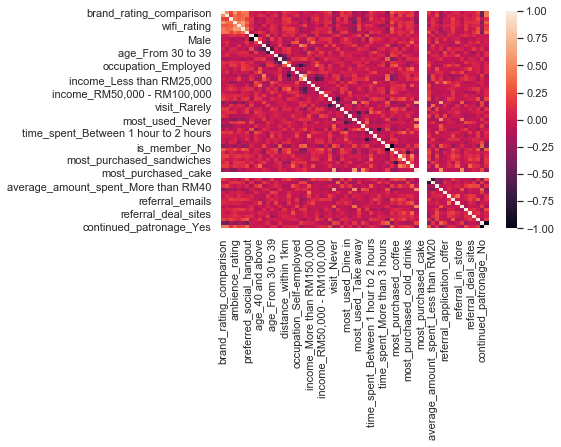

In [720]:
import seaborn as sns

_ = sns.heatmap(df_dummy.corr())

In [721]:
df_dummy.dtypes

timestamp                         object
brand_rating_comparison            int64
price_rating                       int64
sales_promotions_influence         int64
ambience_rating                    int64
                                   ...  
referral_deal_sites                int64
referral_friends                   int64
referral_starbucks_website_app     int64
continued_patronage_No             uint8
continued_patronage_Yes            uint8
Length: 66, dtype: object

In [722]:
df_dummy.to_csv('encoded_starbucks_dummy.csv')

# Predictive Modelling

Seperate the target from the dataset.

In [723]:
X = df_dummy.drop(columns=['continued_patronage_Yes', 'continued_patronage_No', 'timestamp',])
X.shape

(122, 63)

In [724]:
y = df_dummy.continued_patronage_Yes
y.shape

(122,)

I import the required libraries

In [725]:
from sklearn.model_selection import train_test_split

Partitioning the data into train and test data through random sampling

In [726]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape, 
      y_train.shape, 
      X_test.shape, 
      y_test.shape)

(85, 63) (85,) (37, 63) (37,)


The goal of this project is to predict whether a customer will continue the service or not. A false negative prediction will hurt the business more than a false positive one, hence our aim would be to minimize false negative. 

A good metrics for success would be Recall.

I am going to test out three models to see how they perform against a Recall criterion.

- Decision Tree

In [727]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [728]:
dsTreeClf = tree.DecisionTreeClassifier()
_ = dsTreeClf.fit(X_train, y_train)
ds_pred = dsTreeClf.predict(X_test)
ds_accuracy = accuracy_score(y_test, ds_pred)
ds_error = 1 - ds_accuracy
print(ds_accuracy, ds_error)

0.8648648648648649 0.1351351351351351


Ensemble Learning Methods

- Random Forest

In [729]:
from sklearn import ensemble
rfClf = ensemble.RandomForestClassifier()

In [730]:
_ = rfClf.fit(X_train, y_train)
rf_pred = rfClf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_error = 1 - rf_accuracy
print(ds_accuracy, ds_error)

0.8648648648648649 0.1351351351351351


- Gradient Boosting

In [731]:
gbClf = ensemble.GradientBoostingClassifier()
_ = gbClf.fit(X_train, y_train)
gb_pred = gbClf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_error = 1 - gb_accuracy

print(gb_accuracy, gb_error)

0.8648648648648649 0.1351351351351351


Let's see how our models did on Recall

In [732]:
from sklearn.metrics import classification_report
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, ds_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.96      0.86      0.91        29

    accuracy                           0.86        37
   macro avg       0.80      0.87      0.82        37
weighted avg       0.89      0.86      0.87        37

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.87      0.93      0.90        29

    accuracy                           0.84        37
   macro avg       0.77      0.72      0.74        37
weighted avg       0.83      0.84      0.83        37

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.93      0.90      0.91        29

    accuracy                         

### Finetuning Gradient Boosting Before Data Sampling

#### Mod 1

Decision Tree

In [733]:
ds_clf_mod1 = tree.DecisionTreeClassifier(max_depth=6, 
                                          max_leaf_nodes=3,)
_ = ds_clf_mod1.fit(X_train, y_train)
ds_mod1_pred = ds_clf_mod1.predict(X_test)
ds_clf_acc = accuracy_score(y_test, ds_mod1_pred)

ds_clf_acc

0.7837837837837838

Random Forest

In [734]:
rf_clf_mod1 = ensemble.RandomForestClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3,)
_ = rf_clf_mod1.fit(X_train, y_train)
rf_mod1_pred = rf_clf_mod1.predict(X_test)
rf_clf_acc = accuracy_score(y_test, rf_mod1_pred)

rf_clf_acc

0.7837837837837838

Gradient Boosting

In [735]:
gb_clf_mod1 = ensemble.GradientBoostingClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3,
                                            )
_ = gb_clf_mod1.fit(X_train, y_train)
gb_mod1_pred = gb_clf_mod1.predict(X_test)
gb_mod1_acc = accuracy_score(y_test, gb_mod1_pred)

gb_mod1_acc

0.8648648648648649

AUC Scores

In [736]:
y_pred_mod1_prob = ds_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Decision Tree 0.7219827586206897


In [737]:
y_pred_mod1_prob = rf_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Random Forest 0.9482758620689655


In [738]:
y_pred_mod1_prob = gb_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Gradient Boosting 0.853448275862069


In [739]:
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, ds_mod1_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_mod1_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_mod1_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.92      0.79      0.85        29

    accuracy                           0.78        37
   macro avg       0.71      0.77      0.73        37
weighted avg       0.83      0.78      0.80        37

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      1.00      0.88        29

    accuracy                           0.78        37
   macro avg       0.39      0.50      0.44        37
weighted avg       0.61      0.78      0.69        37

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.93      0.90      0.91        29

    accuracy                         

C:\Users\kboyz\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall being our main criterion for success is only slightly better in GBM Mod 1

#### Mod 2

Decision Tree

In [740]:
ds_clf_mod2 = tree.DecisionTreeClassifier(   max_depth=6, 
                                             max_leaf_nodes=3, 
                                             max_features='sqrt', 
                                             random_state=23
                                            )
_ = ds_clf_mod2.fit(X_train, y_train)
ds_mod2_pred = ds_clf_mod2.predict(X_test)
ds_mod2_acc = accuracy_score(y_test, ds_mod2_pred)

ds_mod2_acc

0.8378378378378378

Random Forest

In [741]:
rf_clf_mod2 = ensemble.RandomForestClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3,
                                             random_state=23)
_ = rf_clf_mod2.fit(X_train, y_train)
rf_mod2_pred = rf_clf_mod1.predict(X_test)
rf_mod2_acc = accuracy_score(y_test, rf_mod2_pred)

rf_mod2_acc

0.7837837837837838

Gradient Boosting

In [742]:
gb_clf_mod2 = ensemble.GradientBoostingClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3, 
                                             max_features='sqrt', 
                                             learning_rate=0.1451,
                                             random_state=23
                                            )
_ = gb_clf_mod2.fit(X_train, y_train)
gb_mod2_pred = gb_clf_mod2.predict(X_test)
gb_mod2_acc = accuracy_score(y_test, gb_mod2_pred)

gb_mod2_acc

0.8918918918918919

In [743]:
y_pred_mod2_prob = ds_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Decision Tree 0.7219827586206897


In [746]:
y_pred_mod2_prob = rf_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Random Forest 0.9612068965517242


In [747]:
y_pred_mod2_prob = gb_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Gradient Boosting 0.8836206896551724


In [748]:
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, ds_mod2_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_mod2_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_mod2_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       1.00      0.79      0.88        29

    accuracy                           0.84        37
   macro avg       0.79      0.90      0.81        37
weighted avg       0.91      0.84      0.85        37

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      1.00      0.88        29

    accuracy                           0.78        37
   macro avg       0.39      0.50      0.44        37
weighted avg       0.61      0.78      0.69        37

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.93      0.93      0.93        29

    accuracy                         

C:\Users\kboyz\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Seemingly no change after Mod 2

## Data Standardization and Normalization

Seeing as the data in this dataset is mostly nominal and ordinal data, there is no pressing need for either of these methods

## Data Sampling

In [749]:
y.value_counts()

1    94
0    28
Name: continued_patronage_Yes, dtype: int64

### Combination of Over- and Under- Sampling

In [750]:
# SMOTEENN
from imblearn.combine import SMOTEENN
sampler = SMOTEENN()
X_us, y_us = sampler.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=66)

#### No finetuning

In [751]:
ds_clf = tree.DecisionTreeClassifier()
_ = ds_clf.fit(X_train, y_train)
ds_pred = ds_clf.predict(X_test)
ds_acc = accuracy_score(y_test, ds_pred)

ds_acc

0.925

In [752]:
rf_clf = ensemble.RandomForestClassifier()
_ = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc

0.975

In [753]:
gb_clf = ensemble.GradientBoostingClassifier()
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

gb_acc

0.95

In [754]:
y_pred_prob = ds_clf.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_prob))

AUC_score for Decision Tree 0.9166666666666666


In [755]:
y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_prob))

AUC_score for Random Forest 1.0


In [756]:
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_prob))

AUC_score for Gradient Boosting 1.0


In [757]:
#Gradient Boosting (No Modification)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

# Evaluation Metrics
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, gb_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.88      0.93        16

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.94      0.97        16

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.88      0.93        16

    accuracy                         

Recall shot up to 72% accuracy. This is a good increment.

#### Mod 1

Decision Tree

In [758]:
ds_clf_mod1 = tree.DecisionTreeClassifier(   max_depth=6, 
                                             max_leaf_nodes=3,
                                            )
_ = ds_clf_mod1.fit(X_train, y_train)
ds_mod1_pred =ds_clf_mod1.predict(X_test)
ds_mod1_acc = accuracy_score(y_test, ds_mod1_pred)

ds_mod1_acc

0.9

Random Forest

In [759]:
rf_clf_mod1 = ensemble.RandomForestClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3,
                                            )
_ = rf_clf_mod1.fit(X_train, y_train)
rf_mod1_pred = rf_clf_mod1.predict(X_test)
rf_mod1_acc = accuracy_score(y_test, rf_mod1_pred)

rf_mod1_acc

0.95

Gradient Boosting

In [760]:
gb_clf_mod1 = ensemble.GradientBoostingClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3,
                                            )
_ = gb_clf_mod1.fit(X_train, y_train)
gb_mod1_pred = gb_clf_mod1.predict(X_test)
gb_mod1_acc = accuracy_score(y_test, gb_mod1_pred)

gb_mod1_acc

0.95

In [761]:
y_pred_mod1_prob = ds_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Decision Tree 0.96875


In [762]:
y_pred_mod1_prob = rf_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Random Forest 1.0


In [763]:
y_pred_mod1_prob = gb_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Gradient Boosting 1.0


In [764]:
#Gradient Boosting (Mod1)
_ = gb_clf_mod1.fit(X_train, y_train)
gb_pred = gb_clf_mod1.predict(X_test)

# Evaluation Metrics
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, ds_mod1_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_mod1_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_mod1_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.75      0.86        16

    accuracy                           0.90        40
   macro avg       0.93      0.88      0.89        40
weighted avg       0.91      0.90      0.90        40

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.88      0.93        16

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.88      0.93        16

    accuracy                         

#### Mod 2

Decision Tree

In [765]:
ds_clf_mod2 = tree.DecisionTreeClassifier(
                                             max_depth=6, 
                                             max_leaf_nodes=3, 
                                             max_features='sqrt',
                                             random_state=23
                                            )
_ = ds_clf_mod2.fit(X_train, y_train)
ds_mod2_pred = ds_clf_mod2.predict(X_test)
ds_mod2_acc = accuracy_score(y_test, ds_mod2_pred)

ds_mod2_acc

0.85

Random Forest

In [766]:
rf_clf_mod2 = ensemble.GradientBoostingClassifier(n_estimators=1000, 
                                           max_depth=6, 
                                           max_leaf_nodes=3, 
                                           max_features='sqrt', 
                                           learning_rate=0.1451,
                                           random_state=23
                                          )
_ = rf_clf_mod2.fit(X_train, y_train)
rf_mod2_pred = rf_clf_mod2.predict(X_test)
rf_mod2_acc = accuracy_score(y_test, rf_mod2_pred)

rf_mod2_acc

0.975

Gradient Boosting

In [767]:
gb_clf_mod2 = ensemble.RandomForestClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3, 
                                             max_features='sqrt',
                                             random_state=23
                                            )
_ = gb_clf_mod2.fit(X_train, y_train)
gb_mod2_pred = gb_clf_mod2.predict(X_test)
gb_mod2_acc = accuracy_score(y_test, gb_mod2_pred)

gb_mod2_acc

0.95

In [768]:
y_pred_mod2_prob = ds_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Decision Tree 0.96875


In [769]:
y_pred_mod2_prob = rf_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Random Forest 1.0


In [770]:
y_pred_mod2_prob = gb_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Gradient Boosting 1.0


In [771]:
#Gradient Boosting (Mod1)
_ = gb_clf_mod2.fit(X_train, y_train)
gb_pred = gb_clf_mod2.predict(X_test)

# Evaluation Metrics
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, ds_mod2_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_mod2_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_mod2_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.62      0.77        16

    accuracy                           0.85        40
   macro avg       0.90      0.81      0.83        40
weighted avg       0.88      0.85      0.84        40

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.94      0.97        16

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.88      0.93        16

    accuracy                         

### Repeated Edited Nearest Neighbours

In [772]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

# RepeatedEditedNearestNeighbours
sampler = RepeatedEditedNearestNeighbours(sampling_strategy='auto')
X_us, y_us = sampler.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=66)

#### No finetuning

Decision Tree

In [773]:
ds_clf = tree.DecisionTreeClassifier()
_ = ds_clf.fit(X_train, y_train)
ds_pred = ds_clf.predict(X_test)
ds_acc = accuracy_score(y_test, ds_pred)

ds_acc

0.8571428571428571

Random Forest

In [774]:
rf_clf = ensemble.RandomForestClassifier()
_ = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc

0.9523809523809523

Gradient Boosting

In [775]:
gb_clf = ensemble.GradientBoostingClassifier()
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

gb_acc

0.9047619047619048

In [776]:
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_prob))

AUC_score for Decision Tree 0.9615384615384616


In [777]:
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_prob))

AUC_score for Random Forest 0.9615384615384616


In [778]:
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_prob))

AUC_score for Gradient Boosting 0.9615384615384616


In [779]:
#Gradient Boosting (Default)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('.....Gradient Boosting Report......')
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, gb_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))

.....Gradient Boosting Report......
.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.93      1.00      0.96        13

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

 

#### Mod 1

Decision tree

In [780]:
ds_clf_mod1 = tree.DecisionTreeClassifier(
                                             max_depth=6, 
                                             max_leaf_nodes=3,
                                            )
_ = ds_clf_mod1.fit(X_train, y_train)
ds_mod1_pred = ds_clf_mod1.predict(X_test)
ds_mod1_acc = accuracy_score(y_test, ds_pred)

ds_mod1_acc

0.8571428571428571

Random Forest

In [781]:
rf_clf_mod1 = ensemble.RandomForestClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3,
                                            )
_ = rf_clf_mod1.fit(X_train, y_train)
rf_mod1_pred = rf_clf_mod1.predict(X_test)
rf_mod1_acc = accuracy_score(y_test, rf_pred)

rf_mod1_acc

0.9523809523809523

Gradient Boosting

In [782]:
gb_clf_mod1 = ensemble.GradientBoostingClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3,
                                            )
_ = gb_clf_mod1.fit(X_train, y_train)
gb_mod1_pred = gb_clf_mod1.predict(X_test)
gb_mod1_acc = accuracy_score(y_test, gb_pred)

gb_mod1_acc

0.9047619047619048

In [783]:
y_pred_mod1_prob = ds_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Decision Tree 0.8846153846153846


In [784]:
y_pred_mod1_prob = rf_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Random Forest 1.0


In [785]:
y_pred_mod1_prob = gb_clf_mod1.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_mod1_prob))

AUC_score for Gradient Boosting 0.9903846153846154


In [786]:
#Gradient Boosting (Mod1)
_ = gb_clf_mod1.fit(X_train, y_train)
gb_pred = gb_clf_mod1.predict(X_test)

# Evaluation Metrics
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, ds_mod1_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_mod1_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_mod1_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.85      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.87      1.00      0.93        13

    accuracy                           0.90        21
   macro avg       0.93      0.88      0.89        21
weighted avg       0.92      0.90      0.90        21

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                         

#### Mod 2

Decision Tree

In [787]:
ds_clf_mod2 = tree.DecisionTreeClassifier( 
                                             max_depth=6, 
                                             max_leaf_nodes=3, 
                                             max_features='sqrt', 
                                             random_state=23
                                            )
_ = ds_clf_mod2.fit(X_train, y_train)
ds_mod2_pred = ds_clf_mod2.predict(X_test)
ds_mod2_acc = accuracy_score(y_test, ds_mod2_pred)

ds_mod2_acc

0.9047619047619048

Random Forest

In [788]:
rf_clf_mod2 = ensemble.RandomForestClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3, 
                                             max_features='sqrt',
                                             random_state=23
                                            )
_ = rf_clf_mod2.fit(X_train, y_train)
rf_mod2_pred = rf_clf_mod2.predict(X_test)
rf_mod2_acc = accuracy_score(y_test, rf_mod2_pred)

rf_mod2_acc

0.9047619047619048

Gradient Boosting

In [789]:
gb_clf_mod2 = ensemble.GradientBoostingClassifier(n_estimators=1000, 
                                             max_depth=6, 
                                             max_leaf_nodes=3, 
                                             max_features='sqrt', 
                                             learning_rate=0.1451,
                                             random_state=23
                                            )
_ = gb_clf_mod2.fit(X_train, y_train)
gb_mod2_pred = gb_clf_mod2.predict(X_test)
gb_mod2_acc = accuracy_score(y_test, gb_mod2_pred)

gb_mod2_acc

0.9047619047619048

In [790]:
y_pred_mod2_prob = ds_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Decision Tree', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Decision Tree 0.8846153846153846


In [791]:
y_pred_mod2_prob = rf_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Random Forest', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Random Forest 1.0


In [792]:
y_pred_mod2_prob = gb_clf_mod2.predict_proba(X_test)[:,1]
print('AUC_score for Gradient Boosting', roc_auc_score(y_test, y_pred_mod2_prob))

AUC_score for Gradient Boosting 0.9903846153846154


In [793]:
#Gradient Boosting (Mod2)
_ = gb_clf_mod2.fit(X_train, y_train)
gb_pred = gb_clf_mod2.predict(X_test)

# Evaluation Metrics
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, ds_mod2_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_mod2_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_mod2_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.85      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.87      1.00      0.93        13

    accuracy                           0.90        21
   macro avg       0.93      0.88      0.89        21
weighted avg       0.92      0.90      0.90        21

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                         